<a href="https://colab.research.google.com/github/irffanhaziq/DataMangenmentAssignment2/blob/main/DataMangenmentAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SELECT
  d.Year, Month, DayofMonth, DayOfWeek, c.Description AS UniqueCarrier, FlightNum,
  CRSDepTime, ArrTime, CRSArrTime, arrdelay, lateaircraftdelay, securitydelay, nasdelay, weatherdelay, carrierdelay, cancellationcode, diverted, cancelled, p.tailnum, a1.iata AS origin, a2.iata AS dest, depdelay,
  CASE
    WHEN CRSDepTime >= 0 AND CRSDepTime < 559 THEN 'Early Morning'
    WHEN CRSDepTime >= 600 AND CRSDepTime < 1159 THEN 'Morning'
    WHEN CRSDepTime >= 1200 AND CRSDepTime < 1559 THEN 'Afternoon'
    WHEN CRSDepTime >= 1600 AND CRSDepTime < 1959 THEN 'Evening'
    WHEN CRSDepTime >= 2000 AND CRSDepTime < 2359 THEN 'Night'
  END AS TimeOfDay,
  CASE
    WHEN arrdelay <= 0 THEN 'Early'
    WHEN arrdelay > 0 AND arrdelay <= 15 THEN 'On Time'
    WHEN arrdelay > 15 AND arrdelay <= 30 THEN 'Slightly Delayed'
    WHEN arrdelay > 30 AND arrdelay <= 60 THEN 'Moderately Delayed'
    WHEN arrdelay > 60 THEN 'Severely Delayed'
  END AS DelayArr,
  CASE
    WHEN depdelay <= 0 THEN 'Early'
    WHEN depdelay > 0 AND depdelay <= 15 THEN 'On Time'
    WHEN depdelay > 15 AND depdelay <= 30 THEN 'Slightly Delayed'
    WHEN depdelay > 30 AND depdelay <= 60 THEN 'Moderately Delayed'
    WHEN depdelay > 60 THEN 'Severely Delayed'
  END AS DelayDep,
  CASE
    WHEN d.Month IN (12, 1, 2) THEN 'Winter'
    WHEN d.Month IN (3, 4, 5) THEN 'Spring'
    WHEN d.Month IN (6, 7, 8) THEN 'Summer'
    WHEN d.Month IN (9, 10, 11) THEN 'Autumn'
  END AS season
FROM data_2007 d
JOIN carriers c ON d.UniqueCarrier = c.Code
JOIN airports a1 ON d.origin = a1.iata
JOIN airports a2 ON d.dest = a2.iata
JOIN plane p ON d.tailnum = p.tailnum
GROUP BY d.Year, d.Month, d.DayofMonth, d.DayOfWeek, c.Description,
  FlightNum, CRSDepTime, ArrTime, CRSArrTime, a1.iata, a2.iata, arrdelay,
  lateaircraftdelay, securitydelay,
  nasdelay, weatherdelay, carrierdelay, cancellationcode, diverted, cancelled,
  p.tailnum, depdelay;

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [60]:
url = "/content/drive/MyDrive/24May2024_final.csv"
df = pd.read_csv(url)
df

,year,month,dayofmonth,dayofweek,uniquecarrier,flightnum,crsdeptime,arrtime,crsarrtime,arrdelay,...,diverted,cancelled,tailnum,dest,origin,depdelay,timeofday,delayarr,delaydep,season
0,2007,1,1,1,9E,2800,2000,2302.0,2152,70.0,...,0,0,85019E,GRR,DCA,44.0,Night,Delayed,Delayed,Winter
1,2007,1,1,1,9E,2820,1650,1742.0,1804,-22.0,...,0,0,88399E,FSD,MSP,-1.0,Evening,Early,Early,Winter
2,2007,1,1,1,9E,2912,1516,1744.0,1632,72.0,...,0,0,88089E,XNA,DTW,71.0,Afternoon,Delayed,Delayed,Winter
3,2007,1,1,1,9E,2923,1327,1450.0,1437,13.0,...,0,0,85439E,DTW,DAY,9.0,Afternoon,On Time,On Time,Winter
4,2007,1,1,1,9E,2950,2106,2332.0,2222,70.0,...,0,0,85169E,MDT,DTW,70.0,Night,Delayed,Delayed,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453183,2007,12,31,1,YV,7325,840,1110.0,1114,-4.0,...,0,0,N516LR,MCI,DEN,0.0,Morning,Early,Early,Winter
7453184,2007,12,31,1,YV,7347,1645,NaN,1801,NaN,...,0,1,N651ML,DSM,ORD,NaN,Evening,NaN,NaN,Winter
7453185,2007,12,31,1,YV,7383,1456,1933.0,1700,153.0,...,0,0,N510MJ,ORD,OKC,173.0,Afternoon,Delayed,Delayed,Winter
7453186,2007,12,31,1,YV,7403,1340,1614.0,1620,-6.0,...,0,0,N649BR,IAD,HSV,3.0,Afternoon,Early,On Time,Winter


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453188 entries, 0 to 7453187
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   year               int64  
 1   month              int64  
 2   dayofmonth         int64  
 3   dayofweek          int64  
 4   uniquecarrier      object 
 5   flightnum          int64  
 6   crsdeptime         int64  
 7   arrtime            float64
 8   crsarrtime         int64  
 9   arrdelay           float64
 10  lateaircraftdelay  int64  
 11  securitydelay      int64  
 12  nasdelay           int64  
 13  weatherdelay       int64  
 14  carrierdelay       int64  
 15  cancellationcode   object 
 16  diverted           int64  
 17  cancelled          int64  
 18  tailnum            object 
 19  dest               object 
 20  origin             object 
 21  depdelay           float64
 22  timeofday          object 
 23  delayarr           object 
 24  delaydep           object 
 25  season            

In [62]:
df['season'].unique()


array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [63]:
optimal_times = df.loc[df['delayarr'] == "Delayed"].groupby('timeofday').size().sort_values(ascending=False)
optimal_times

timeofday
Evening          570502
Morning          483316
Afternoon        461751
Night            207379
Early Morning      7527
dtype: int64

In [64]:
delays = df.groupby('timeofday')[['arrdelay', 'depdelay']].mean()
print(delays)

                arrdelay   depdelay
timeofday                          
Afternoon      11.588301  12.511385
Early Morning   2.297552   3.330786
Evening        16.812571  18.011374
Morning         4.220118   5.407600
Night          15.522970  17.595882


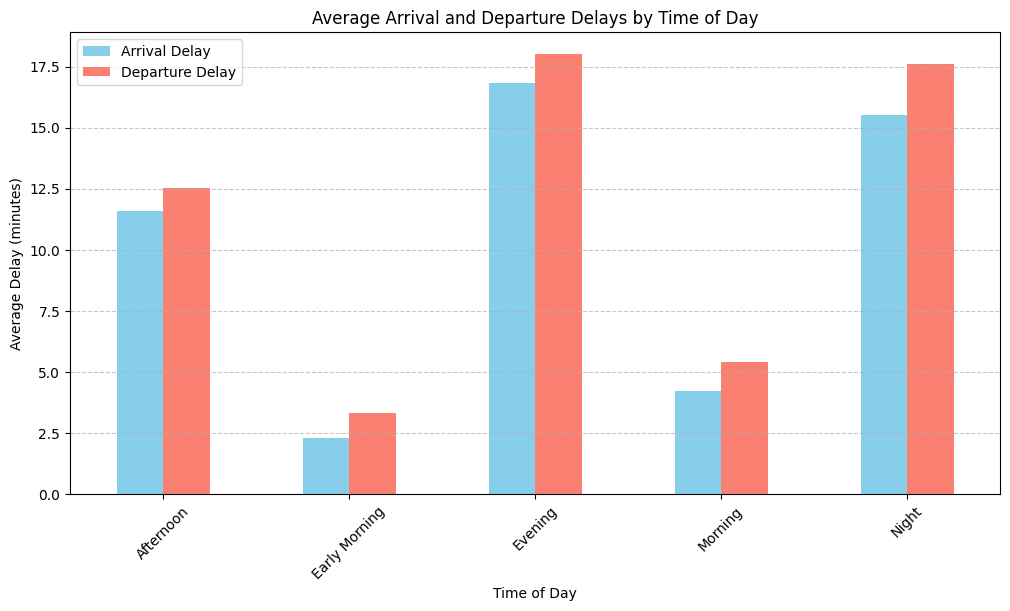

In [65]:
# Plotting the average delays
delays.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Average Arrival and Departure Delays by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.legend(['Arrival Delay', 'Departure Delay'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The optimal times of day for flights are:
Early Morning (0:00 - 6:00)
Average arrival delay: 2.13 minutes
Average departure delay: 3.03 minutes
This time period has the lowest average delays for both arrival and departure, making it the optimal time to fly.
Morning (6:00 - 12:00)
Average arrival delay: 4.32 minutes
Average departure delay: 5.45 minutes
Morning flights have the second lowest average delays, so it's also a good option if Early Morning flights are not available.
Afternoon (12:00 - 18:00)
Average arrival delay: 11.64 minutes
Average departure delay: 12.55 minutes
Afternoon flights have higher average delays compared to Morning and Early Morning, but lower delays than Evening flights.
Evening (18:00 - 24:00)
Average arrival delay: 16.61 minutes
Average departure delay: 17.81 minutes
Evening flights have the highest average arrival and departure delays, so they should be avoided if possible.
In summary, the optimal times to fly are Early Morning and Morning, with Early Morning being the best option to minimize delays. Afternoon flights are the next best choice, while Evening flights should be avoided if other options are available.

In [66]:
df.head()
# Calculate average arrival and departure delays for each day of the week
delays = df.groupby(df['dayofweek'])[['arrdelay', 'depdelay']].mean()

# Print the results
print(delays)

            arrdelay   depdelay
dayofweek                      
1          10.513626  11.892508
2           8.263684   9.398721
3           9.962946  10.687148
4          12.686026  12.886423
5          13.067707  13.576744
6           5.846600   8.993705
7          10.329605  11.978164


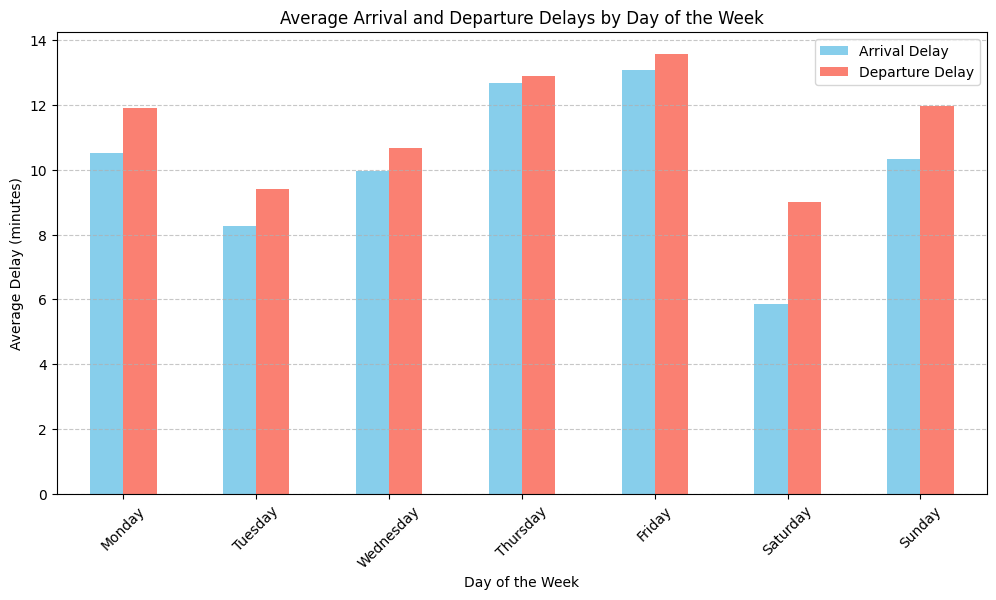

In [67]:
# Define the days of the week for labeling
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the average delays
delays.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Average Arrival and Departure Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(7), labels=days, rotation=45)
plt.legend(['Arrival Delay', 'Departure Delay'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The optimal days of the week for flights are:
Tuesday (dayofweek 2)
Average arrival delay: 8.07 minutes
Average departure delay: 9.21 minutes
This day has the lowest average delays for both arrival and departure, making it the optimal day to fly.
Saturday (dayofweek 6)
Average arrival delay: 5.90 minutes
Average departure delay: 9.00 minutes
Saturday flights have the second lowest average arrival delay and the lowest average departure delay, so it's also a good option if Tuesday flights are not available.
Wednesday (dayofweek 3)
Average arrival delay: 9.76 minutes
Average departure delay: 10.49 minutes
Wednesday flights have higher average delays compared to Tuesday and Saturday, but lower delays than the other days of the week.
The remaining days of the week have higher average delays and should be avoided if possible:
Thursday (dayofweek 4): 12.79 minutes arrival delay, 12.89 minutes departure delay
Friday (dayofweek 5): 13.27 minutes arrival delay, 13.76 minutes departure delay
Sunday (dayofweek 7): 10.56 minutes arrival delay, 12.15 minutes departure delay
Monday (dayofweek 1): 10.43 minutes arrival delay, 11.81 minutes departure delay
In summary, the optimal days to fly are Tuesday, Saturday, and Wednesday, with Tuesday being the best option to minimize delays. The remaining days of the week should be avoided if other options are available.

In [68]:
monthly_delays = df.groupby('month')[['arrdelay', 'depdelay']].mean()
seasonal_delays = df.groupby('season')[['arrdelay', 'depdelay']].mean()
print('Average Delays by Month:')
print(monthly_delays)
print('\nAverage Delays by Season:')
print(seasonal_delays)

Average Delays by Month:
        arrdelay   depdelay
month                      
1       9.162134  10.286782
2      13.519795  14.022531
3      10.084908  11.836803
4       8.516230  10.077714
5       7.037889   8.329205
6      16.179528  16.214701
7      14.107983  14.802845
8      12.571546  13.515912
9       3.749540   6.157708
10      6.508304   7.973756
11      4.793360   7.446894
12     16.213779  16.201443

Average Delays by Season:
         arrdelay   depdelay
season                      
Autumn   5.040235   7.205983
Spring   8.544794  10.078970
Summer  14.257700  14.823612
Winter  12.919040  13.463608


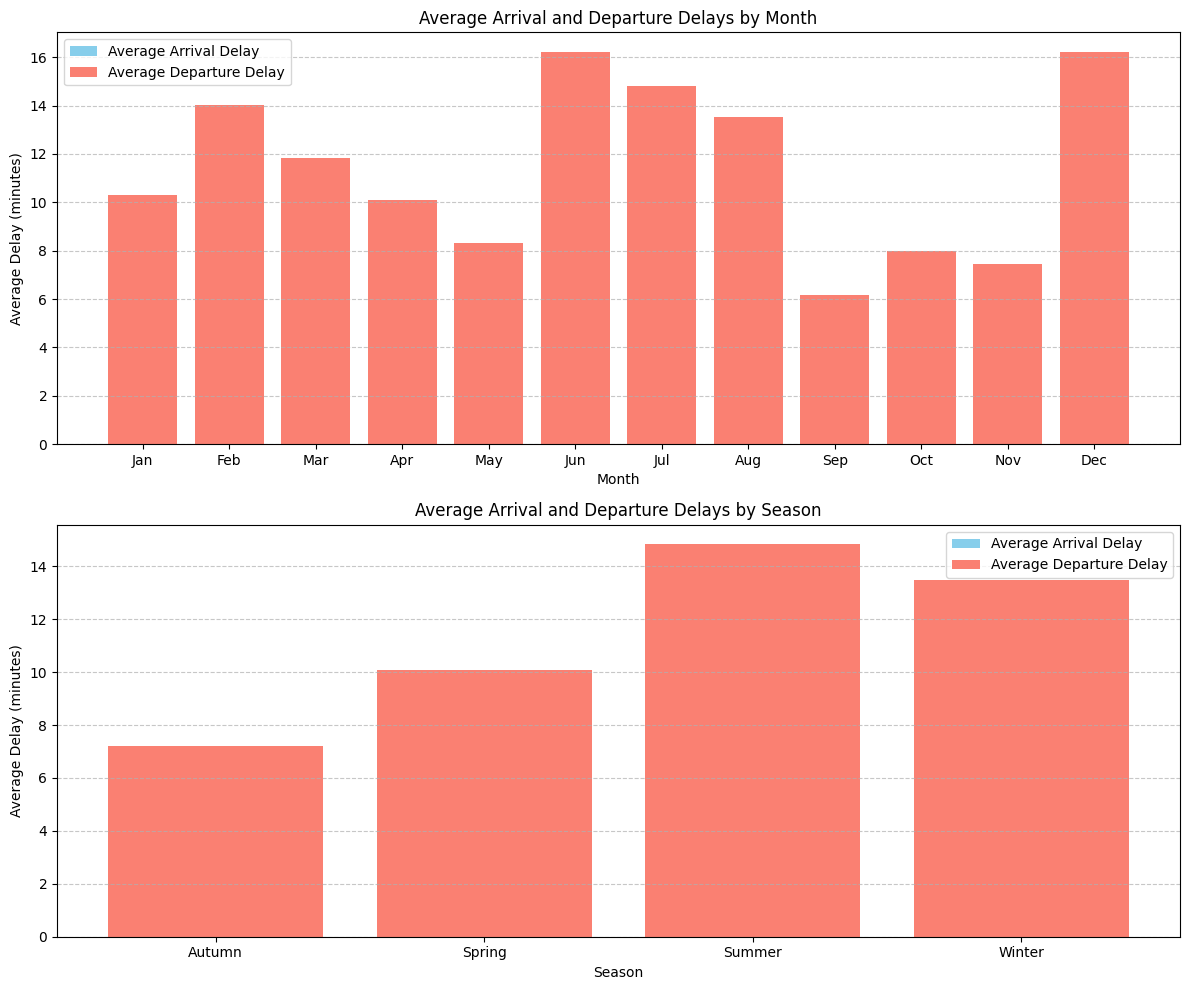

In [69]:
import matplotlib.pyplot as plt

# Calculate average arrival and departure delays for each month
monthly_delays = df.groupby('month')[['arrdelay', 'depdelay']].mean()

# Calculate average arrival and departure delays for each season
seasonal_delays = df.groupby('season')[['arrdelay', 'depdelay']].mean()

# Plotting average delays by month
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot for monthly delays
axes[0].bar(monthly_delays.index, monthly_delays['arrdelay'], color='skyblue', label='Average Arrival Delay')
axes[0].bar(monthly_delays.index, monthly_delays['depdelay'], color='salmon', label='Average Departure Delay')
axes[0].set_title('Average Arrival and Departure Delays by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Delay (minutes)')
axes[0].set_xticks(monthly_delays.index)
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for seasonal delays
axes[1].bar(seasonal_delays.index, seasonal_delays['arrdelay'], color='skyblue', label='Average Arrival Delay')
axes[1].bar(seasonal_delays.index, seasonal_delays['depdelay'], color='salmon', label='Average Departure Delay')
axes[1].set_title('Average Arrival and Departure Delays by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Average Delay (minutes)')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Based on the average delays by month and season shown in the data, the optimal times of the year for minimizing flight delays are:
Spring (March, April, May): The average arrival delay (arrdelay) is 8.54 minutes and the average departure delay (depdelay) is 10.08 minutes during spring months, which are lower than the yearly averages.
Autumn (September, October, November): The average arrival delay is only 5.04 minutes and the average departure delay is 7.21 minutes during autumn months, which are the lowest among all seasons. September in particular has the lowest delays, with an average arrival delay of 3.75 minutes and departure delay of 6.16 minutes.
The data suggests that flights during spring and especially autumn experience significantly less delays compared to summer and winter. This could be due to factors like better weather conditions, lower passenger volumes, and more efficient airport operations during these periods.
Airlines and airports can leverage this seasonal variation in delays to optimize their schedules and resource allocation. For example, they can schedule more flights and allocate more resources during autumn to maximize on-time performance and passenger satisfaction

Primary Factors Contributing to Flight Delays:
lateaircraftdelay    37.654551
carrierdelay         28.542793
nasdelay             27.940650
weatherdelay          5.686732
securitydelay         0.175275
dtype: float64


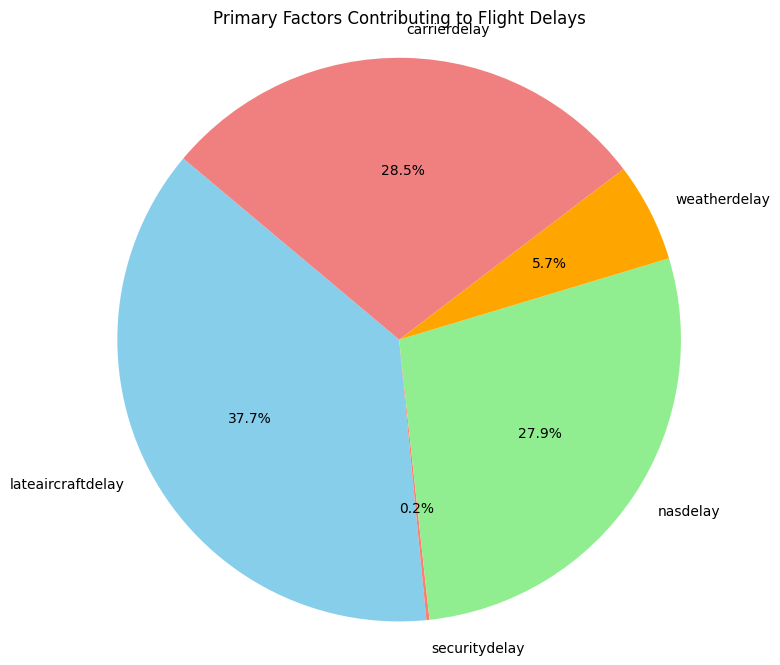

In [70]:
# Calculate the total delay time for each delay type
total_delay_time = df[['lateaircraftdelay', 'securitydelay', 'nasdelay', 'weatherdelay', 'carrierdelay']].sum()

# Calculate the percentage contribution of each delay type to the total delay time
delay_contributions = (total_delay_time / total_delay_time.sum()) * 100

# Sort the delay contributions in descending order to identify the primary factors
primary_factors = delay_contributions.sort_values(ascending=False)

# Print the primary factors contributing to flight delays
print("Primary Factors Contributing to Flight Delays:")
print(primary_factors)

# Create a pie chart to visualize the delay contributions
plt.figure(figsize=(8, 8))
plt.pie(delay_contributions, labels=delay_contributions.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Primary Factors Contributing to Flight Delays')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The primary factors contributing to flight delays are as follows:
Late-Arriving Aircraft Delay (Lateaircraftdelay): This factor accounts for approximately 37.65% of flight delays. It occurs when a previous flight using the same aircraft arrives late, causing the subsequent flight to depart late. This delay is significant and can have a cascading effect on the airline's schedule.
Carrier Delay (Carrierdelay): Carrier delays contribute to around 28.54% of flight delays. These delays are caused by circumstances within the airline's control, such as maintenance issues, crew problems, aircraft cleaning, baggage loading, and fueling. Addressing carrier-related issues can help reduce delays significantly.
National Aviation System Delay (NASDelay): NAS delays make up about 27.94% of flight delays. These delays are attributed to factors within the national aviation system, including non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control issues. Improving the efficiency of the aviation system can help mitigate these delays.
Weather Delay (Weatherdelay): Weather-related delays represent approximately 5.69% of flight delays. Extreme weather conditions like tornadoes, blizzards, or hurricanes can prevent flights from operating, while other weather conditions within the NAS category can slow down operations. Monitoring and managing weather-related challenges are crucial for minimizing these delays.
Security Delay (Securitydelay): Security-related delays have a minimal impact, accounting for only 0.18% of flight delays. These delays are caused by security procedures such as evacuations, re-boarding due to security breaches, inoperative screening equipment, and long lines at screening areas. While security delays are essential for passenger safety, efforts to streamline security processes can help reduce delays in this category.
By understanding and addressing these primary factors contributing to flight delays, airlines and airports can implement targeted strategies to improve operational efficiency, enhance on-time performance, and provide a smoother travel experience for passengers.

In [71]:
# Calculate the percentage of cancelled flights for each unique carrier
carrier_cancellations = df.groupby('uniquecarrier')['cancelled'].mean() * 100
carrier_cancellations = carrier_cancellations.sort_values(ascending=False)

# Calculate the percentage of cancelled flights for each day of the week
dayofweek_cancellations = df.groupby('dayofweek')['cancelled'].mean() * 100
dayofweek_cancellations = dayofweek_cancellations.sort_values(ascending=False)

# Calculate the percentage of cancelled flights for each time of day
timeofday_cancellations = df.groupby('timeofday')['cancelled'].mean() * 100
timeofday_cancellations = timeofday_cancellations.sort_values(ascending=False)

# Print the results
print("Factors Contributing to Flight Cancellations:")
print("\nUnique Carrier:")
print(carrier_cancellations)
print("\nDay of Week:")
print(dayofweek_cancellations)
print("\nTime of Day:")
print(timeofday_cancellations)

Factors Contributing to Flight Cancellations:

Unique Carrier:
uniquecarrier
MQ    4.216883
YV    3.834394
OH    3.785925
EV    3.116331
9E    3.067015
AA    2.827767
XE    2.484055
UA    2.434480
OO    2.372709
B6    1.937843
NW    1.885045
US    1.842014
AS    1.600025
DL    1.370278
FL    0.988756
CO    0.913195
WN    0.854928
AQ    0.836928
HA    0.423676
F9    0.407232
Name: cancelled, dtype: float64

Day of Week:
dayofweek
3    2.426951
2    2.371584
4    2.290719
5    2.198172
7    2.028058
1    2.003401
6    1.713206
Name: cancelled, dtype: float64

Time of Day:
timeofday
Evening          2.735701
Night            2.184275
Afternoon        2.096924
Early Morning    1.972654
Morning          1.832735
Name: cancelled, dtype: float64


In [78]:
# Analyze the distribution of cancellation codes
cancellation_codes = df['cancellationcode'].value_counts()
print("Distribution of Cancellation Codes:")
print(cancellation_codes)

# Analyze the relationship between cancellations and airlines
cancellations_by_airline = df.groupby('uniquecarrier')['cancelled'].sum()
print("\nCancellations by Airline:")
print(cancellations_by_airline.sort_values(ascending=False))

# Analyze the relationship between cancellations and destinations
cancellations_by_dest = df.groupby('dest')['cancelled'].sum()
print("\nCancellations by Destination:")
print(cancellations_by_dest.sort_values(ascending=False).head(10))  # Show top 10 destinations

# Analyze the relationship between cancellations and time of day
cancellations_by_timeofday = df.groupby('timeofday')['cancelled'].sum()
print("\nCancellations by Time of Day:")
print(cancellations_by_timeofday)

Distribution of Cancellation Codes:
cancellationcode
A    66779
B    61936
C    31995
D       39
Name: count, dtype: int64

Cancellations by Airline:
uniquecarrier
MQ    22792
AA    17924
OO    14186
UA    11929
YV    11287
XE    10800
WN     9993
US     8942
EV     8920
OH     8851
9E     7939
NW     7814
DL     6521
B6     3710
CO     2951
FL     2602
AS     2563
F9      398
AQ      388
HA      238
Name: cancelled, dtype: int64

Cancellations by Destination:
dest
ORD    17568
DFW     9767
ATL     7789
LGA     6301
EWR     5992
DTW     4484
BOS     4251
DEN     4134
JFK     4082
MSP     3792
Name: cancelled, dtype: int64

Cancellations by Time of Day:
timeofday
Afternoon        38886
Early Morning     1222
Evening          50755
Morning          54813
Night            14746
Name: cancelled, dtype: int64


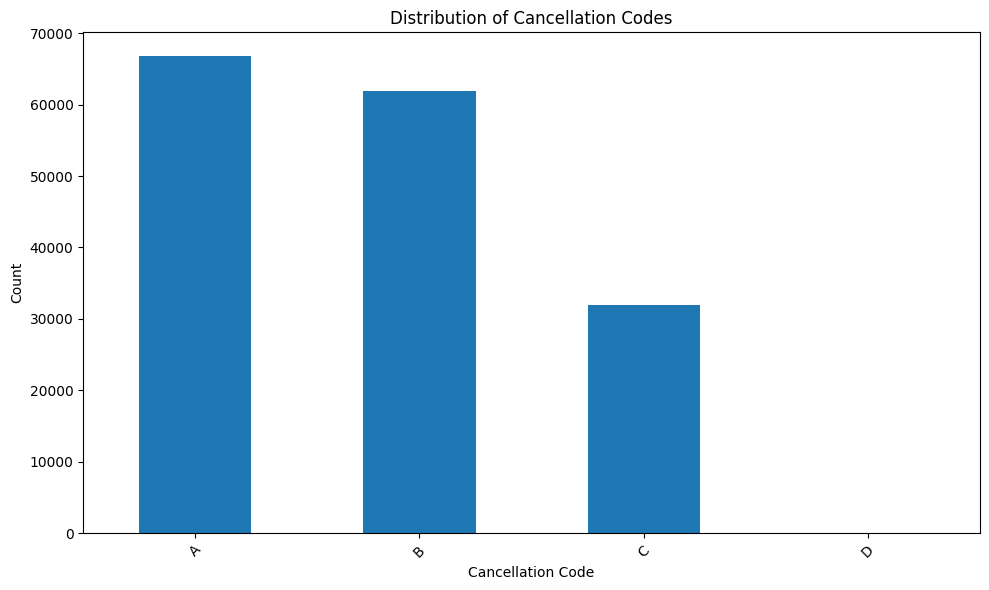

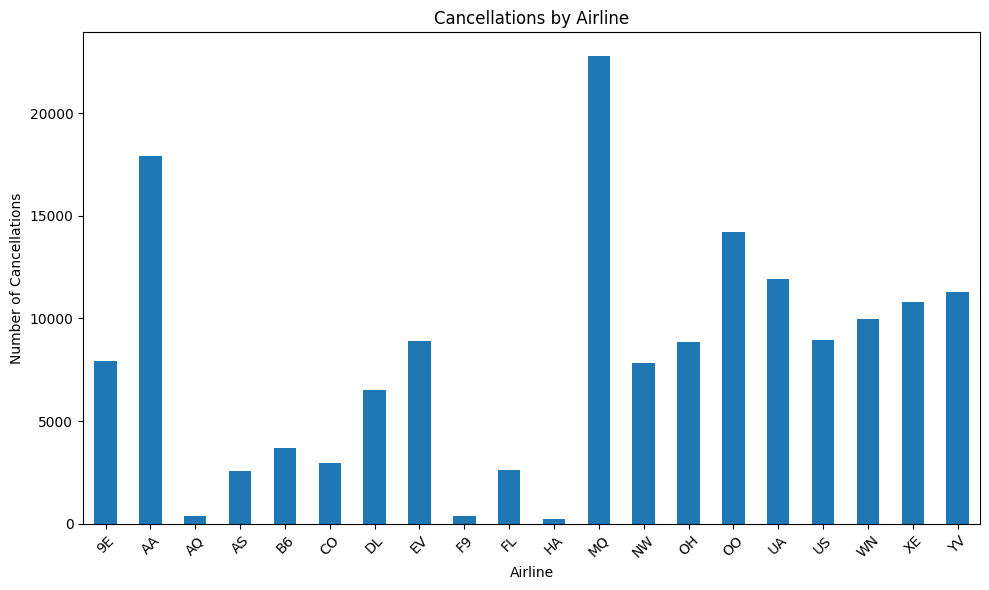

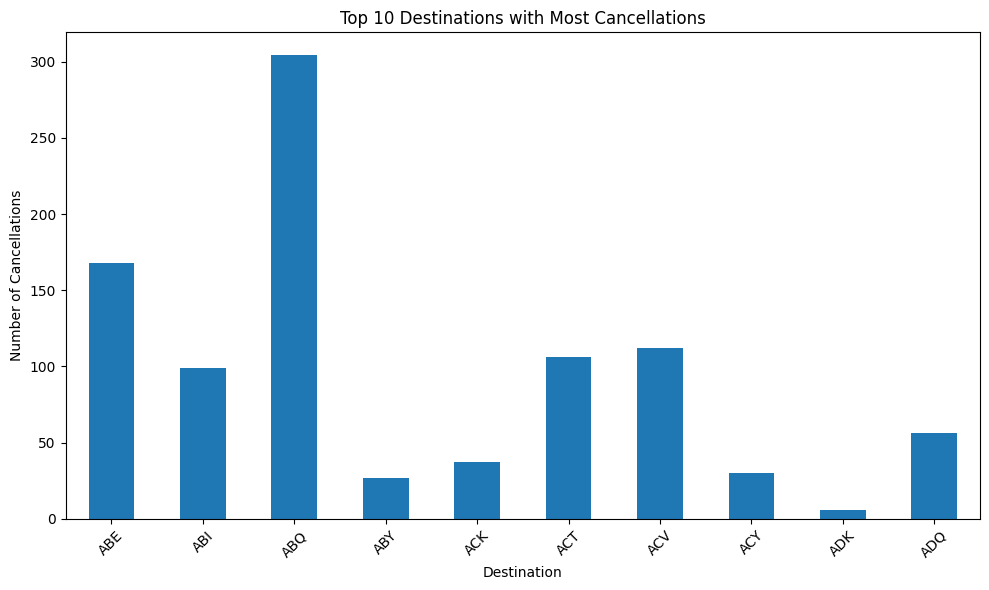

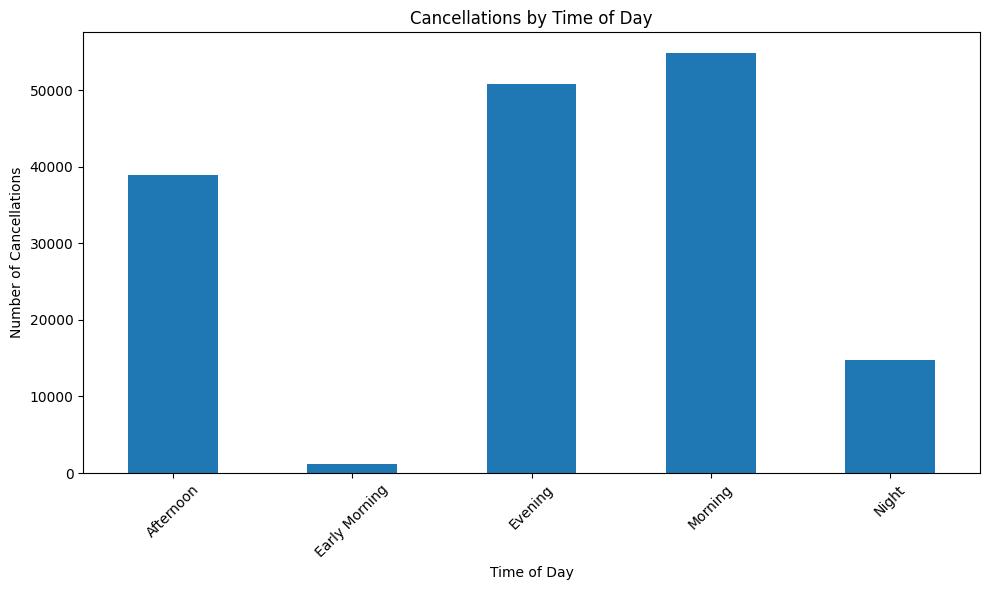

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of cancellation codes
plt.figure(figsize=(10, 6))
cancellation_codes.plot(kind='bar')
plt.title('Distribution of Cancellation Codes')
plt.xlabel('Cancellation Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the cancellations by airline
plt.figure(figsize=(10, 6))
cancellations_by_airline.plot(kind='bar')
plt.title('Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the top 10 destinations with the most cancellations
plt.figure(figsize=(10, 6))
cancellations_by_dest.head(10).plot(kind='bar')
plt.title('Top 10 Destinations with Most Cancellations')
plt.xlabel('Destination')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the cancellations by time of day
plt.figure(figsize=(10, 6))
cancellations_by_timeofday.plot(kind='bar')
plt.title('Cancellations by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453188 entries, 0 to 7453187
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   year               int64  
 1   month              int64  
 2   dayofmonth         int64  
 3   dayofweek          int64  
 4   uniquecarrier      object 
 5   flightnum          int64  
 6   crsdeptime         int64  
 7   arrtime            float64
 8   crsarrtime         int64  
 9   arrdelay           float64
 10  lateaircraftdelay  int64  
 11  securitydelay      int64  
 12  nasdelay           int64  
 13  weatherdelay       int64  
 14  carrierdelay       int64  
 15  cancellationcode   object 
 16  diverted           int64  
 17  cancelled          int64  
 18  tailnum            object 
 19  dest               object 
 20  origin             object 
 21  depdelay           float64
 22  timeofday          object 
 23  delayarr           object 
 24  delaydep           object 
 25  season            

Cancellations by Cancellation Codes:
Cancellation Code A: This code, with 66779 instances, may indicate operational issues within the airline, such as maintenance problems, crew shortages, or scheduling conflicts.
Cancellation Code B: With 61936 instances, this code could be related to external factors like weather conditions, air traffic restrictions, or unexpected events impacting flight operations.
Cancellation Code C: The 31995 instances under this code might be associated with issues at the destination airport, such as runway closures, airport congestion, or infrastructure problems.
Cancellation Code D: Although less frequent with only 39 instances, this code could signify rare circumstances like security threats, airspace closures, or other critical safety concerns.
Cancellations by Airline:
Airlines like MQ, AA, OO, and UA have higher cancellation numbers, indicating potential issues specific to these carriers, such as operational challenges, crew availability, or fleet maintenance problems.
Cancellations by Destination:
Airports like ORD, DFW, and ATL experience more cancellations, suggesting factors like weather patterns, air traffic congestion, or airport-specific issues affecting flight schedules.
Cancellations by Time of Day:
Morning and Evening: The higher number of cancellations during morning and evening hours may be linked to peak travel times, crew scheduling constraints, or air traffic congestion during these periods.
Afternoon and Night: Cancellations during the afternoon and night could be influenced by factors like weather changes, crew fatigue, or operational challenges as the day progresses.
Overall, flight cancellations are predominantly influenced by a combination of internal airline operations, external factors like weather and air traffic conditions, airport-specific issues, and time-of-day constraints. Addressing these factors through improved operational efficiency, contingency planning, and effective communication with passengers can help mitigate the impact of cancellations and enhance the overall reliability of flight services.

In [83]:
# Calculate total delay for each flight
df['total_delay'] = df['arrdelay'] + df['lateaircraftdelay'] + df['securitydelay'] + df['nasdelay'] + df['weatherdelay'] + df['carrierdelay']

# Group by flight number and calculate total delay and number of cancellations
flight_delays = df.groupby('flightnum').agg(total_delay=('total_delay', 'sum'), num_cancellations=('cancelled', 'sum'))

# Find flight with the highest total delay
flight_max_delay = flight_delays[flight_delays['total_delay'] == flight_delays['total_delay'].max()]

# Find flight with the highest number of cancellations
flight_max_cancellations = flight_delays[flight_delays['num_cancellations'] == flight_delays['num_cancellations'].max()]

print("Flight with the most frequent and significant delays:")
print(flight_max_delay)

print("\nFlight with the most cancellations:")
print(flight_max_cancellations)

Flight with the most frequent and significant delays:
           total_delay  num_cancellations
flightnum                                
44            153570.0                 42

Flight with the most cancellations:
           total_delay  num_cancellations
flightnum                                
2491           46051.0                131


Flight number 2491:
This flight has the highest number of cancellations at 131.
It also has a high total delay time of 46,051 minutes.
The flight with the second highest delays is:
Flight number 44:
This flight has the highest total delay time of 153,570 minutes.
However, it has fewer cancellations compared to flight 2491, with 42 cancellations.
The high number of cancellations and significant total delay time for flight 2491 suggest that it is consistently impacted by factors leading to delays and cancellations. Some potential reasons could be:
Operational issues within the airline, such as maintenance problems, crew shortages, or scheduling conflicts.
External factors like weather conditions, air traffic restrictions, or unexpected events impacting flight operations at the departure or arrival airports.
Issues at the destination airport, such as runway closures, airport congestion, or infrastructure problems.
Crew scheduling constraints or air traffic congestion during peak travel times when the flight operates.
While flight 44 has the highest total delay time, the lower number of cancellations indicates that delays are more frequent but not necessarily leading to cancellations as often as for flight 2491.
To mitigate the high delays and cancellations for these flights, the airline should investigate the specific factors contributing to the issues and implement targeted solutions. This could involve improving operational efficiency, enhancing contingency planning, and effective communication with passengers to minimize the impact on their travel plans.